In [31]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [32]:
# https://www.kaggle.com/datasets/jeevanrh/drug200csv
df = pd.read_csv('./../data/drug200.csv')

In [33]:
df.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
103,56,M,NORMAL,HIGH,8.966,drugX
121,15,M,HIGH,NORMAL,17.206,drugY
101,45,F,HIGH,HIGH,12.854,drugA
52,62,M,LOW,NORMAL,27.183,drugY
83,38,F,HIGH,NORMAL,11.326,drugA


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [35]:
# convert categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cols:
    if col == 'Drug':
        continue
    else:
        df[col] = le.fit_transform(df[col])

In [36]:
df.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
87,69,1,1,0,15.478,drugY
67,17,1,2,1,10.832,drugX
84,47,0,1,0,10.067,drugC
41,58,0,0,1,14.239,drugB
36,32,1,0,1,9.445,drugA


In [37]:
df.drop(['Drug'], axis=1).corr()

,Age,Sex,BP,Cholesterol,Na_to_K
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000


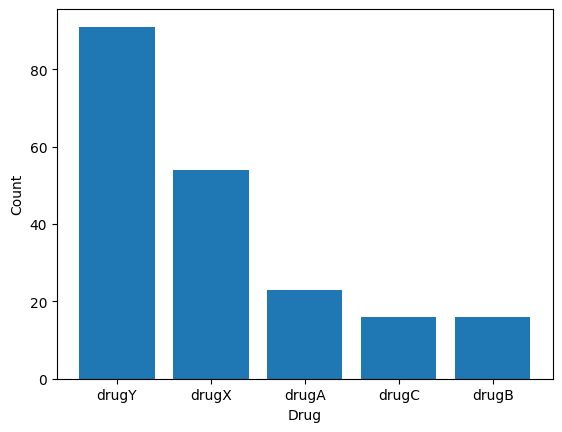

In [38]:
counts = df['Drug'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Drug')
plt.ylabel('Count')
plt.show()

In [41]:
y = df['Drug']
X = df.drop(['Drug'], axis=1)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [55]:
from sklearn.tree import DecisionTreeClassifier

criterion = 'gini'
max_depth = 5
model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [56]:
y_pred = model.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.975


[Text(0.625, 0.9, 'x[4] <= 14.839\ngini = 0.694\nsamples = 160\nvalue = [18, 13, 13, 43, 73]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.668\nsamples = 87\nvalue = [18.0, 13.0, 13.0, 43.0, 0.0]'),
 Text(0.5625, 0.8, 'True  '),
 Text(0.25, 0.5, 'x[0] <= 52.0\ngini = 0.487\nsamples = 31\nvalue = [18, 13, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\ngini = 0.357\nsamples = 56\nvalue = [0, 0, 13, 43, 0]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\ngini = 0.5\nsamples = 26\nvalue = [0, 0, 13, 13, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 0, 13, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 0, 30, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 73\nvalue = [0, 0, 0, 0, 73]'),
 Text(0.6875, 0.8, '  False')]

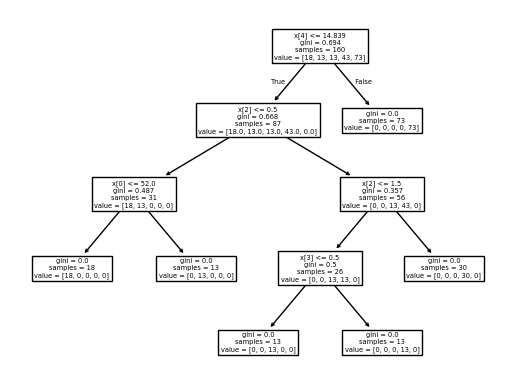

In [58]:
from sklearn.tree import plot_tree

plot_tree(model)